In [3]:
import pandas as pd
import numpy as np

KeyboardInterrupt: 

In [2]:
df=pd.read_excel('C://Users//demey//Documents//2024-2025//Industry Project//Bariatric Project Study Data 202505.xlsx', sheet_name='Sheet1')

NameError: name 'pd' is not defined

In [ ]:
core_X_data=df[['gender', 'age', 'height', 'weight', 'bmi', 'ibw', 'ebw', 'surgical_hist_cnt', 'family_hist_cnt', 'chronic_meds_cnt']].copy()
cm_cols= [col for col in df.columns if col.startswith('CM_')]

core_X_data= core_X_data.join(df[cm_cols].fillna(0).astype(int))
core_X_data

NameError: name 'df' is not defined

In [5]:
cm_cols

['CM_AIDS',
 'CM_ALCOHOL',
 'CM_ANEMDEF',
 'CM_ARTH',
 'CM_BLDLOSS',
 'CM_CHF',
 'CM_CHRNLUNG',
 'CM_COAG',
 'CM_DEPRESS',
 'CM_DM',
 'CM_DMCX',
 'CM_DRUG',
 'CM_HTN_C',
 'CM_HYPOTHY',
 'CM_LIVER',
 'CM_LYMPH',
 'CM_LYTES',
 'CM_METS',
 'CM_NEURO',
 'CM_OBESE',
 'CM_PARA',
 'CM_PERIVASC',
 'CM_PSYCH',
 'CM_PULMCIRC',
 'CM_RENLFAIL',
 'CM_SMOKE',
 'CM_TUMOR',
 'CM_ULCER',
 'CM_VALVE',
 'CM_WGHTLOSS',
 'CM_APNEA',
 'CM_CHOLSTRL',
 'CM_OSTARTH',
 'CM_HPLD',
 'CM_AIDS.1',
 'CM_ALCOHOL.1',
 'CM_ANEMDEF.1',
 'CM_ARTH.1',
 'CM_BLDLOSS.1',
 'CM_CHF.1',
 'CM_CHRNLUNG.1',
 'CM_COAG.1',
 'CM_DEPRESS.1',
 'CM_DM.1',
 'CM_DMCX.1',
 'CM_DRUG.1',
 'CM_HTN_C.1',
 'CM_HYPOTHY.1',
 'CM_LIVER.1',
 'CM_LYMPH.1',
 'CM_LYTES.1',
 'CM_METS.1',
 'CM_NEURO.1',
 'CM_OBESE.1',
 'CM_PARA.1',
 'CM_PERIVASC.1',
 'CM_PSYCH.1',
 'CM_PULMCIRC.1',
 'CM_RENLFAIL.1',
 'CM_SMOKE.1',
 'CM_TUMOR.1',
 'CM_ULCER.1',
 'CM_VALVE.1',
 'CM_WGHTLOSS.1',
 'CM_APNEA.1',
 'CM_CHOLSTRL.1',
 'CM_OSTARTH.1',
 'CM_HPLD.1',
 'CM_AIDS.2',


In [6]:
core_X_data.head()

,gender,age,height,weight,bmi,ibw,ebw,surgical_hist_cnt,family_hist_cnt,chronic_meds_cnt,...,CM_RENLFAIL.5,CM_SMOKE.5,CM_TUMOR.5,CM_ULCER.5,CM_VALVE.5,CM_WGHTLOSS.5,CM_APNEA.5,CM_CHOLSTRL.5,CM_OSTARTH.5,CM_HPLD.5
0,Female,50,154,146.0,61.56,55.99,90.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Female,52,168,96.0,34.00,70.00,26.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Female,23,163,143.0,53.82,58.04,84.96,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Female,23,176,120.0,38.74,52.59,67.41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Female,57,162,112.0,42.68,65.35,46.65,0,0,7,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Identify all complication-related columns
comp_cols = [col for col in df.columns if 'comp' in col.lower()]

# Create new dataset without the original complication columns
df_new = df.drop(columns=comp_cols)

# Add a single 'complication' column: 1 if any original comp column == 1, else 0
df_new['complication'] = (df[comp_cols] == 1).any(axis=1).astype(int)

# Display new dataset shape
print("New dataset shape (rows, columns):", df_new.shape)

# Show a sample of the new 'complication' column alongside the ID
# Show the first 10 rows of id and complication
print(df_new[['id', 'complication']].head(10))
print("First 15 column names:", df_new.columns.tolist())

New dataset shape (rows, columns): (344, 756)
      id  complication
0  45207             0
1    824             0
2  37253             1
3  40073             0
4   1616             0
5  40501             0
6  38458             0
7  37531             0
8  46862             1
9  22775             0
First 15 column names: ['id', 'capture_date', 'doctor', 'procedure_category', 'form_date', 'admission_id', 'hospitalDesc', 'hospital_wardDesc', 'days_since_admission', 'length_of_stay', 'gender', 'age', 'weight', 'height', 'bmi', 'ibw', 'ebw', 'surgical_hist_cnt', 'family_hist_cnt', 'chronic_meds_cnt', 'cm_count', 'morbidity', 'CM_AIDS', 'CM_ALCOHOL', 'CM_ANEMDEF', 'CM_ARTH', 'CM_BLDLOSS', 'CM_CHF', 'CM_CHRNLUNG', 'CM_COAG', 'CM_DEPRESS', 'CM_DM', 'CM_DMCX', 'CM_DRUG', 'CM_HTN_C', 'CM_HYPOTHY', 'CM_LIVER', 'CM_LYMPH', 'CM_LYTES', 'CM_METS', 'CM_NEURO', 'CM_OBESE', 'CM_PARA', 'CM_PERIVASC', 'CM_PSYCH', 'CM_PULMCIRC', 'CM_RENLFAIL', 'CM_SMOKE', 'CM_TUMOR', 'CM_ULCER', 'CM_VALVE', 'CM_WGHTLOSS',

In [8]:
core_Y_data=df_new[["complication"]]

core_Y_data

,complication
0,0
1,0
2,1
3,0
4,0
...,...
339,0
340,0
341,1
342,0


In [9]:
core_Y_data[core_Y_data['complication'] == 1].count()


complication    34
dtype: int64

In [10]:
core_Y_data[core_Y_data['complication'] != 0].count()

complication    34
dtype: int64

In [11]:
core_X_data.replace(to_replace="Female", value=1, inplace=True)
core_X_data.replace(to_replace="Male", value=0,inplace=True)

C:\Users\demey\AppData\Local\Temp\ipykernel_16708\1814036871.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  core_X_data.replace(to_replace="Male", value=0,inplace=True)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(core_X_data, core_Y_data, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train.values.ravel())

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.855072463768116
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        60
           1       0.00      0.00      0.00         9

    accuracy                           0.86        69
   macro avg       0.43      0.49      0.46        69
weighted avg       0.75      0.86      0.80        69



In [13]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights to penalize misclassification of class 1 more
class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=core_Y_data['complication'].values)
weights_dict = {0: class_weights[0], 1: class_weights[1] * 2}  # Double the penalty for class 1

# Re-train logistic regression with custom class weights
logreg_weighted = LogisticRegression(max_iter=5000, class_weight=weights_dict)
logreg_weighted.fit(core_X_data, core_Y_data.values.ravel())


LogisticRegression(class_weight={0: 0.5548387096774193, 1: 10.117647058823529},
                   max_iter=5000)

In [14]:
# Let's not take away training data and purely base off of cross validation instead
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_scores = cross_val_score(logreg_weighted, core_X_data, core_Y_data.values.ravel(), cv=10, scoring='accuracy')
# Print cross-validation scores
print("Cross-validation scores:", cv_scores)


Cross-validation scores: [0.54285714 0.62857143 0.57142857 0.68571429 0.61764706 0.76470588
 0.61764706 0.64705882 0.55882353 0.73529412]


In [22]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', ],
    'solver': ['lbfgs', 'saga'],
    'class_weight': [weights_dict, None]
}

# Initialize logistic regression (do not set class_weight here)
logreg_gs = LogisticRegression(max_iter=8000)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg_gs,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(core_X_data, core_Y_data.values.ravel())

# Show best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

Best parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated accuracy: 0.8953964194373402


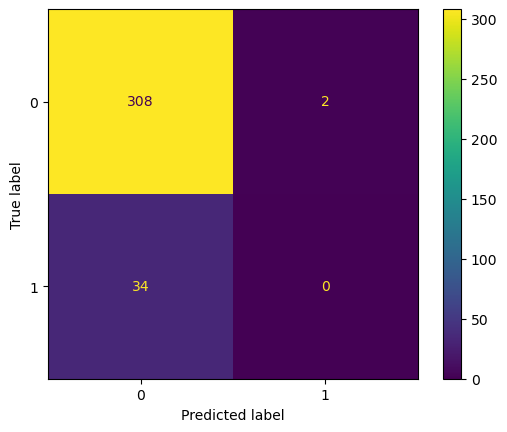

In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get cross-validated predictions
y_pred_cv = cross_val_predict(grid_search, core_X_data, core_Y_data.values.ravel(), cv=10)

# Compute confusion matrix
cm_cv = confusion_matrix(core_Y_data.values.ravel(), y_pred_cv)

# Display confusion matrix
disp_cv = ConfusionMatrixDisplay(confusion_matrix=cm_cv)
disp_cv.plot()

In [24]:
# Redo grid search with 'recall' for class 1 as the scoring metric
grid_search_recall = GridSearchCV(
    estimator=logreg_gs,
    param_grid=param_grid,
    scoring='recall',  # This will use recall for the positive class (class 1)
    cv=5,
    n_jobs=-1
)

grid_search_recall.fit(core_X_data, core_Y_data.values.ravel())

print("Best parameters (recall):", grid_search_recall.best_params_)
print("Best cross-validated recall (class 1):", grid_search_recall.best_score_)

Best parameters (recall): {'C': 0.01, 'class_weight': {0: 0.5548387096774193, 1: 10.117647058823529}, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated recall (class 1): 0.8523809523809524


c:\Users\demey\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\demey\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


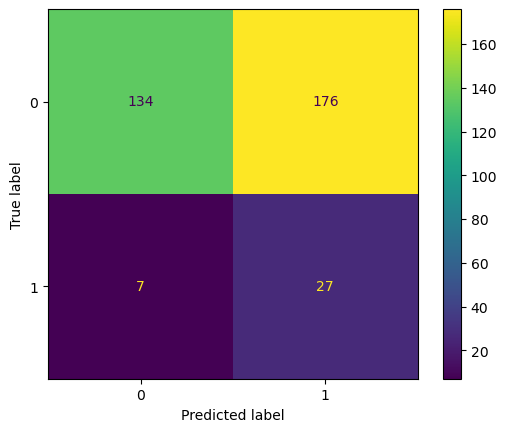

In [25]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get cross-validated predictions
y_pred_cv = cross_val_predict(grid_search_recall, core_X_data, core_Y_data.values.ravel(), cv=10)

# Compute confusion matrix
cm_cv = confusion_matrix(core_Y_data.values.ravel(), y_pred_cv)

# Display confusion matrix
disp_cv = ConfusionMatrixDisplay(confusion_matrix=cm_cv)
disp_cv.plot()